- 기본으로 제공하는 내장 법안을 기준으로 분석
- 법률 문서 분석

###### NLTK 자연어 처리 패키지
- Natural Language Toolkit
- 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지
- 주요 기능 : 말뭉치(corpus), 토큰 생성, 형태소 분석, 품사 태깅

In [63]:
import nltk

In [64]:
from konlpy.corpus import kobill

In [65]:
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [66]:
doc_ko = kobill.open(kobill.fileids()[9]).read()

In [67]:
doc_ko[:100], len(doc_ko)

('결혼중개업의 관리에 관한 법률 일부개정법률안\n\n(한선교의원 대표발의 )\n\n 의 안\n 번 호\n\n9899\n\n발의연월일 : 2010.  11.  15.\n\n발  의  자 : 한선교․손범규',
 8549)

In [68]:
from konlpy.tag import Okt
t = Okt()

In [69]:
# 명사분석
tokens_ko = t.nouns(doc_ko)
tokens_ko[:20]

['결혼',
 '중개업',
 '관리',
 '관',
 '법률',
 '일부',
 '개정',
 '법률',
 '안',
 '한선교',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발']

In [70]:
ko = nltk.Text(tokens_ko, name = '결혼중개업의 관리에 관한 법률 일부개정법률안')

In [71]:
ko

<Text: 결혼중개업의 관리에 관한 법률 일부개정법률안>

In [72]:
len(ko.tokens), len(set(ko.tokens))

(1544, 313)

In [73]:
from matplotlib import pyplot as plt

In [74]:
from korea_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


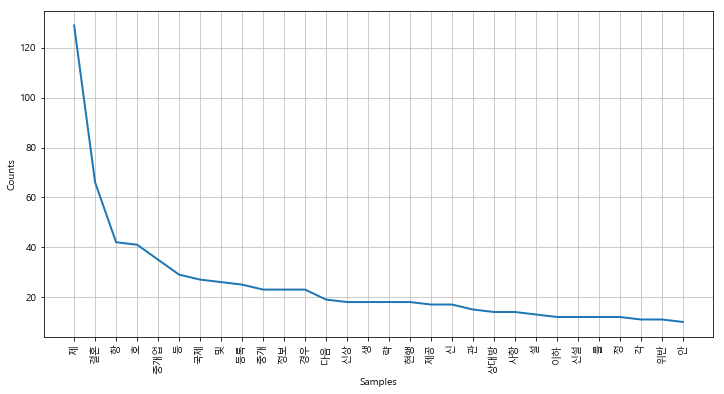

In [75]:
# 시각화
plt.figure(figsize = (12, 6))
# 상위 30개만 노출, 빈도수 표현
ko.plot(30)
plt.show()

In [76]:
# 임의로 stopword를 설정
stop_words = ['.', '(', ')', '%', '-', '의', '을', '다', '만', '로']
# tokens_ko = [ each_word for each_word in ko if each_word not in stop_words ]

In [59]:
def myFilter1(x) :
    if len(x) > 1 :
        return True
    else :
        if x not in stop_words :
            return True
        else :
            return False
        
def myFilter2(x) :
    if len(x) > 1 or x not in stop_words :
        return True
    else :
        return False

tokens_ko = list(filter(myFilter1, tokens_ko))

In [79]:
tokens_ko

['결혼',
 '중개업',
 '관리',
 '관',
 '법률',
 '일부',
 '개정',
 '법률',
 '안',
 '한선교',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '한선교',
 '손범규',
 '이인기',
 '유성엽',
 '이애주',
 '이한성',
 '안홍준',
 '김태원',
 '안형환',
 '정갑윤',
 '의원',
 '인',
 '제안',
 '이유',
 '최근',
 '국제',
 '결혼',
 '상당수',
 '국제',
 '결혼',
 '중개',
 '업체',
 '통해',
 '일부',
 '국제',
 '결혼',
 '중개업',
 '이윤',
 '추구',
 '위',
 '사실',
 '른',
 '정보',
 '거짓',
 '정보',
 '제공',
 '속성',
 '성사',
 '국제',
 '결혼',
 '상대',
 '국',
 '외교',
 '마찰',
 '결혼',
 '생활',
 '조기',
 '파탄',
 '야기',
 '등',
 '문',
 '제',
 '발생',
 '이',
 '국제',
 '결혼',
 '문화',
 '정착',
 '결혼',
 '중개업',
 '피해',
 '사례',
 '최소',
 '위해',
 '국제',
 '결혼',
 '중개업',
 '등록',
 '기준',
 '국제',
 '결혼',
 '중개업',
 '인권',
 '침해',
 '불법',
 '결혼',
 '중개',
 '행위',
 '대한',
 '처벌',
 '규정',
 '함',
 '또한',
 '국제',
 '결혼',
 '중개업',
 '이용자',
 '상대방',
 '제공',
 '신상',
 '정보',
 '결혼',
 '생활',
 '유지',
 '지장',
 '초래',
 '정신질환',
 '병력',
 '최근',
 '금고',
 '이상',
 '범죄',
 '경력',
 '포함',
 '신상',
 '정보',
 '상대방',
 '언어',
 '번역본',
 '포함',
 '의',
 '내용',
 '보존',
 '등',
 '현행법',
 '운영',
 '일부',
 '미비',
 '점',
 '개선',
 

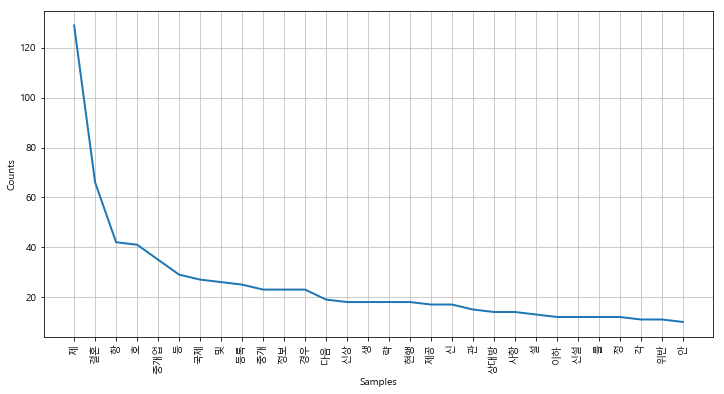

In [80]:
# 시각화
plt.figure(figsize=(12, 6))
ko.plot(30)
plt.show()

###### 특정 단어의 빈도 형태와 문장 안의 위치를 파악 : .dispersion_plot()

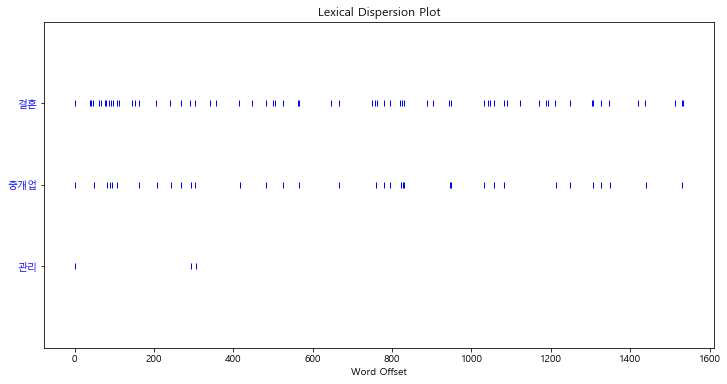

In [81]:
# 논설위원이나 작가들의 총 데이터를 분석해서 통계적으로 살펴보면,
# 글의 특성을 예측해낼 수 있다
plt.figure(figsize=(12, 6))
ko.dispersion_plot(['결혼', '중개업', '관리'])

###### 특정 단어의 주변 단어 : .concordance()

In [83]:
# 텍스트 주변에 자주 나오는 표현
ko.concordance('결혼')

Displaying 25 of 25 matches:
 결혼 중개업 관리 관 법률 일부 개정 법률 안 한선교 의원 대표 발의 의 
주 이한성 안홍준 김태원 안형환 정갑윤 의원 인 제안 이유 최근 국제 결혼 상당수 국제 결혼 중개 업체 통해 일부 국제 결혼 중개업 이윤 추구 
김태원 안형환 정갑윤 의원 인 제안 이유 최근 국제 결혼 상당수 국제 결혼 중개 업체 통해 일부 국제 결혼 중개업 이윤 추구 위 사실 른 정보 
안 이유 최근 국제 결혼 상당수 국제 결혼 중개 업체 통해 일부 국제 결혼 중개업 이윤 추구 위 사실 른 정보 거짓 정보 제공 속성 성사 국제 
 중개업 이윤 추구 위 사실 른 정보 거짓 정보 제공 속성 성사 국제 결혼 상대 국 외교 마찰 결혼 생활 조기 파탄 야기 등 문 제 발생 이 국
실 른 정보 거짓 정보 제공 속성 성사 국제 결혼 상대 국 외교 마찰 결혼 생활 조기 파탄 야기 등 문 제 발생 이 국제 결혼 문화 정착 결혼 
대 국 외교 마찰 결혼 생활 조기 파탄 야기 등 문 제 발생 이 국제 결혼 문화 정착 결혼 중개업 피해 사례 최소 위해 국제 결혼 중개업 등록 
 결혼 생활 조기 파탄 야기 등 문 제 발생 이 국제 결혼 문화 정착 결혼 중개업 피해 사례 최소 위해 국제 결혼 중개업 등록 기준 국제 결혼 
발생 이 국제 결혼 문화 정착 결혼 중개업 피해 사례 최소 위해 국제 결혼 중개업 등록 기준 국제 결혼 중개업 인권 침해 불법 결혼 중개 행위 
 결혼 중개업 피해 사례 최소 위해 국제 결혼 중개업 등록 기준 국제 결혼 중개업 인권 침해 불법 결혼 중개 행위 대한 처벌 규정 함 또한 국제
 위해 국제 결혼 중개업 등록 기준 국제 결혼 중개업 인권 침해 불법 결혼 중개 행위 대한 처벌 규정 함 또한 국제 결혼 중개업 이용자 상대방 
중개업 인권 침해 불법 결혼 중개 행위 대한 처벌 규정 함 또한 국제 결혼 중개업 이용자 상대방 제공 신상 정보 결혼 생활 유지 지장 초래 정신
 처벌 규정 함 또한 국제 결혼 중개업 이용자 상대방 제공 신상 정

###### 비슷한 의미를 내포하게끔 사용된 단어 : .collocations()

In [84]:
ko.collocations()

출입국관리 사무소; 이용자 상대방; 성폭력 가정폭력; 성매매 성폭력; 중개업 이용자; 가정폭력 아동학대


###### .vocab().most_common( )

In [85]:
data = ko.vocab().most_common(150)

In [86]:
data

[('제', 129),
 ('결혼', 66),
 ('항', 42),
 ('호', 41),
 ('중개업', 35),
 ('등', 29),
 ('국제', 27),
 ('및', 26),
 ('등록', 25),
 ('중개', 23),
 ('정보', 23),
 ('경우', 23),
 ('다음', 19),
 ('신상', 18),
 ('생', 18),
 ('략', 18),
 ('현행', 18),
 ('제공', 17),
 ('신', 17),
 ('관', 15),
 ('상대방', 14),
 ('사항', 14),
 ('설', 13),
 ('이하', 12),
 ('신설', 12),
 ('를', 12),
 ('정', 12),
 ('각', 11),
 ('위반', 11),
 ('안', 10),
 ('자', 10),
 ('포함', 10),
 ('보존', 10),
 ('청장', 10),
 ('그', 10),
 ('여성가족부', 10),
 ('신고', 10),
 ('관련', 10),
 ('의', 9),
 ('이', 9),
 ('이용자', 9),
 ('시장', 9),
 ('군수', 9),
 ('법률', 8),
 ('사무소', 8),
 ('호의', 8),
 ('해당', 8),
 ('작성', 8),
 ('장관', 8),
 ('함', 7),
 ('이상', 7),
 ('범죄', 7),
 ('자본금', 7),
 ('서류', 7),
 ('징역', 7),
 ('벌금', 7),
 ('중', 7),
 ('일부', 6),
 ('업체', 6),
 ('거짓', 6),
 ('언어', 6),
 ('번역본', 6),
 ('내용', 6),
 ('거나', 6),
 ('각각', 6),
 ('로', 6),
 ('관할', 6),
 ('통보', 6),
 ('취소', 6),
 ('령', 6),
 ('광고', 6),
 ('휴업', 6),
 ('폐업', 6),
 ('생활', 5),
 ('경력', 5),
 ('여부', 5),
 ('외', 5),
 ('출입국관리', 5),
 ('공시', 5),
 ('조치', 5),
 ('기록', 5),


In [87]:
dict(data)

{'제': 129,
 '결혼': 66,
 '항': 42,
 '호': 41,
 '중개업': 35,
 '등': 29,
 '국제': 27,
 '및': 26,
 '등록': 25,
 '중개': 23,
 '정보': 23,
 '경우': 23,
 '다음': 19,
 '신상': 18,
 '생': 18,
 '략': 18,
 '현행': 18,
 '제공': 17,
 '신': 17,
 '관': 15,
 '상대방': 14,
 '사항': 14,
 '설': 13,
 '이하': 12,
 '신설': 12,
 '를': 12,
 '정': 12,
 '각': 11,
 '위반': 11,
 '안': 10,
 '자': 10,
 '포함': 10,
 '보존': 10,
 '청장': 10,
 '그': 10,
 '여성가족부': 10,
 '신고': 10,
 '관련': 10,
 '의': 9,
 '이': 9,
 '이용자': 9,
 '시장': 9,
 '군수': 9,
 '법률': 8,
 '사무소': 8,
 '호의': 8,
 '해당': 8,
 '작성': 8,
 '장관': 8,
 '함': 7,
 '이상': 7,
 '범죄': 7,
 '자본금': 7,
 '서류': 7,
 '징역': 7,
 '벌금': 7,
 '중': 7,
 '일부': 6,
 '업체': 6,
 '거짓': 6,
 '언어': 6,
 '번역본': 6,
 '내용': 6,
 '거나': 6,
 '각각': 6,
 '로': 6,
 '관할': 6,
 '통보': 6,
 '취소': 6,
 '령': 6,
 '광고': 6,
 '휴업': 6,
 '폐업': 6,
 '생활': 5,
 '경력': 5,
 '여부': 5,
 '외': 5,
 '출입국관리': 5,
 '공시': 5,
 '조치': 5,
 '기록': 5,
 '계약서': 5,
 '때': 5,
 '법': 5,
 '개정': 4,
 '최근': 4,
 '국': 4,
 '기준': 4,
 '정신질환': 4,
 '금고': 4,
 '영업': 4,
 '시': 4,
 '요건': 4,
 '항제': 4,
 '교육': 4,
 '영업정지': 4,
 '부분': 4,
 

In [89]:
from wordcloud import WordCloud

In [90]:
wc = WordCloud(relative_scaling=0.2,
              background_color = 'white',
              font_path = 'c:/windows/Fonts/malgun.ttf').generate_from_frequencies(dict(data))

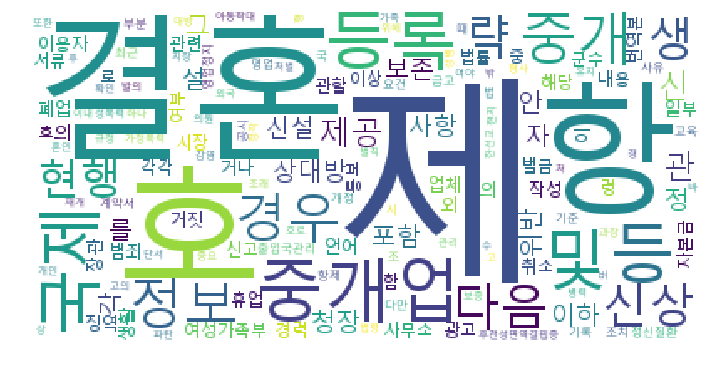

In [91]:
plt.figure(figsize=(12, 8))
plt.imshow(wc)
plt.axis('off')
plt.show()